<a href="https://colab.research.google.com/github/AnirudhJM24/Rental-market-segmentation/blob/main/geographical_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
!pip install folium

In [ ]:
import folium

In [ ]:
df = pd.read_csv('locationdistance.csv')

In [ ]:
df.head()

,Unnamed: 0,lat,lng,da,dr
0,0,18.580630,73.983310,6.853044,12.973710
1,1,18.488368,73.898667,10.389648,5.343271
2,2,18.564243,73.776857,15.045194,10.805272
3,3,18.540346,73.793718,13.884791,8.410823
4,4,18.550517,73.942494,4.167259,7.729086


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.head()

,lat,lng,da,dr
0,18.580630,73.983310,6.853044,12.973710
1,18.488368,73.898667,10.389648,5.343271
2,18.564243,73.776857,15.045194,10.805272
3,18.540346,73.793718,13.884791,8.410823
4,18.550517,73.942494,4.167259,7.729086


In [ ]:
pune_housing = folium.Map(location = [18.550518,	73.942494])

In [ ]:
lat = []
lng = []
lat = df['lat']
lng = df['lng']

In [ ]:
pune_housing

In [ ]:
fg = folium.FeatureGroup(name = 'pune')
for i in range(0, len(df)):
  fg.add_child(folium.Marker(location = [lat[i],lng[i]],icon = folium.Icon(color='red') ))


pune_housing.add_child(fg)

In [ ]:
x = df.loc[:,].values

In [ ]:
x

array([[18.5806299 , 73.9833099 ,  6.85304417, 12.9737099 ],
       [18.4883683 , 73.8986672 , 10.38964757,  5.34327098],
       [18.5642431 , 73.7768573 , 15.04519388, 10.80527212],
       [18.5403459 , 73.7937182 , 13.88479138,  8.41082315],
       [18.5505175 , 73.9424945 ,  4.16725859,  7.72908622],
       [18.51489115, 73.92626218,  7.29078927,  5.89968568],
       [18.4779905 , 73.8940627 , 11.61506714,  6.16047883],
       [18.5618834 , 73.8101957 , 11.60148042,  7.48747184],
       [18.6047823 , 73.68831998, 24.43278656, 21.15188841],
       [18.4858591 , 73.8889844 , 10.90770307,  5.15639805],
       [18.6053321 , 73.7519996 , 17.77799668, 15.2339641 ],
       [18.6279288 , 73.8009829 , 13.46411773, 13.23840262],
       [18.4945396 , 73.7214015 , 22.86277129, 16.43460588],
       [18.4784897 , 73.8213256 , 15.23442593,  7.84248329],
       [18.6022495 , 73.7644454 , 16.42797781, 13.95556174],
       [18.4358283 , 73.8963635 , 16.16252245, 10.69385536],
       [18.5000084 , 73.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(x)
pf = pd.DataFrame(data = pc
             , columns = ['principal component 1', 'principal component 2'])

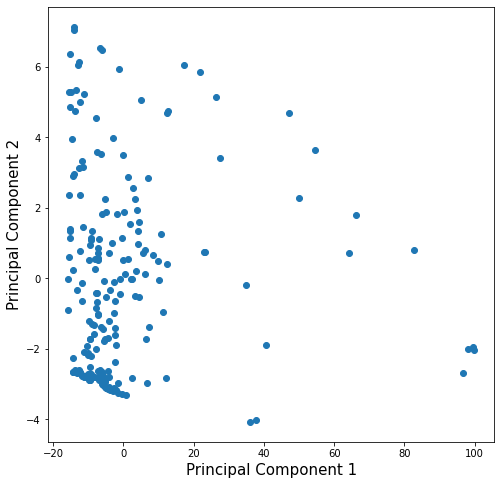

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.scatter(pf['principal component 1']
               , pf['principal component 2'])

In [ ]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

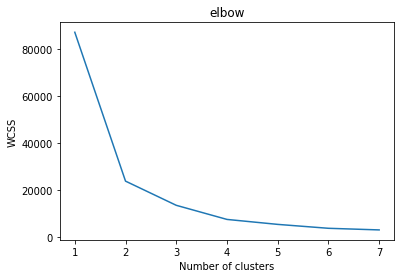

In [ ]:
wcss=[]
for i in range(1,8):
 kmeans = KMeans(i)
 kmeans.fit(x)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters = range(1,8)
plt.plot(number_clusters,wcss)
plt.title('elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(7)
kmeans.fit(x)

KMeans(n_clusters=7)

In [ ]:
kmeansp = kmeans.predict(x)

In [ ]:
labels = kmeans.labels_
print(labels[:100])

[6 0 4 4 6 6 0 0 2 0 2 4 2 4 4 4 2 4 4 0 6 6 6 3 0 1 4 4 0 2 6 4 4 6 4 4 4
 0 6 6 4 4 0 2 4 0 2 4 2 2 0 4 4 4 4 0 6 2 4 6 5 4 4 2 2 6 4 4 0 4 4 2 6 6
 0 6 0 2 4 4 4 0 0 0 6 6 1 2 0 4 6 0 4 6 6 2 6 4 0 4]


In [ ]:
df['cluster_num'] = labels

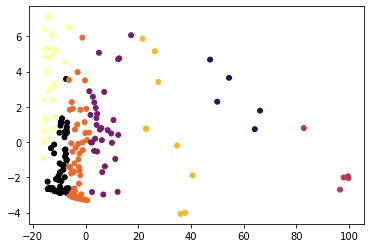

In [ ]:
plt.scatter(pf['principal component 1'], pf['principal component 2'], c=kmeansp, s=25, cmap='inferno')

In [ ]:
m2  = df.groupby(df['cluster_num'])
m2.mean()

,lat,lng,da,dr
cluster_num,,,,
0,18.521701,73.854441,10.649951,5.219990
1,18.885169,73.994105,52.166084,56.947462
2,18.610722,73.796627,19.894098,18.950906
3,18.191056,74.557586,81.470144,82.917316
4,18.529424,73.820907,14.626013,10.190355
5,18.609454,73.813079,35.911227,36.143043
6,18.561197,73.908695,4.531124,6.101128


In [ ]:
pune_housing_segments = folium.Map(location = [18.550518,	73.942494])

In [ ]:
fg1 = folium.FeatureGroup(name = 'pune')
fg1.add_child(folium.Marker(location = [18.521701,	73.854441],icon = folium.Icon(color='red') ))
fg1.add_child(folium.Marker(location = [18.885169,	73.994105],icon = folium.Icon(color='red') ))
fg1.add_child(folium.Marker(location = [18.610722,	73.796627	],icon = folium.Icon(color='red') ))
fg1.add_child(folium.Marker(location = [18.191056	,74.557586],icon = folium.Icon(color='red') ))
fg1.add_child(folium.Marker(location = [18.529424	,73.820907],icon = folium.Icon(color='red') ))
fg1.add_child(folium.Marker(location = [18.609454	,73.813079],icon = folium.Icon(color='red') ))
fg1.add_child(folium.Marker(location = [18.561197,	73.908695],icon = folium.Icon(color='red') ))

pune_housing_segments.add_child(fg1)

cluster_num
0    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
1    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
2    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
3    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
4    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

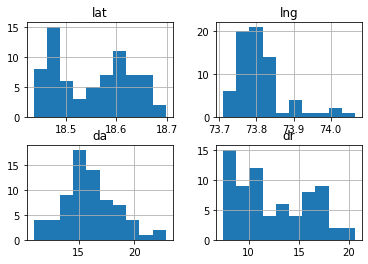

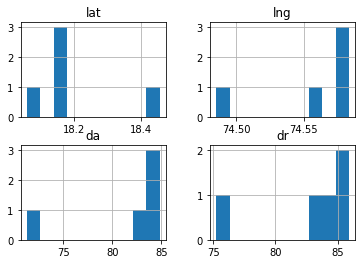

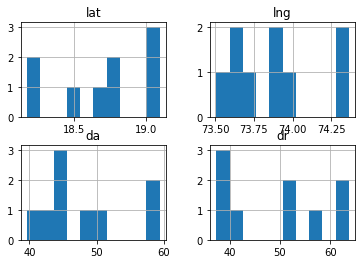

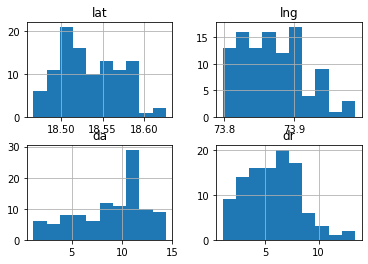

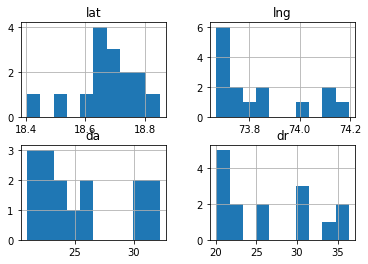

In [ ]:
m2.hist()

0         AxesSubplot(0.1,0.559091;0.363636x0.340909)
1    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2             AxesSubplot(0.1,0.15;0.363636x0.340909)
3        AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

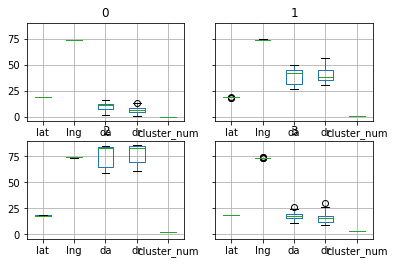

In [ ]:
m2.boxplot()